In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [34]:
df=pd.read_csv("D:\E - Productivity\Sachin\Supervised Learning_R4_Project2_Thera Bank\Bank_Personal_Loan_Modelling-1.csv")

In [35]:
df.drop("ID",axis=1,inplace=True)

In [36]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [37]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [38]:
df.shape

(5000, 13)

In [39]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [40]:
ExM = df['Experience'][df['Experience'] >= 0].median()
df['Experience'].where(df['Experience'] >= 0,ExM,inplace = True)
df[df['Experience'] < 0]['Experience'].count()

## Treating the negative values in the column Experience

0

In [41]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000465,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


dropping Zipcode as it has lesser correlation with target value.

Income, Family, CCAvg and CD Account features has good correlation with target variable.

In [42]:
df.drop("ZIP Code",axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


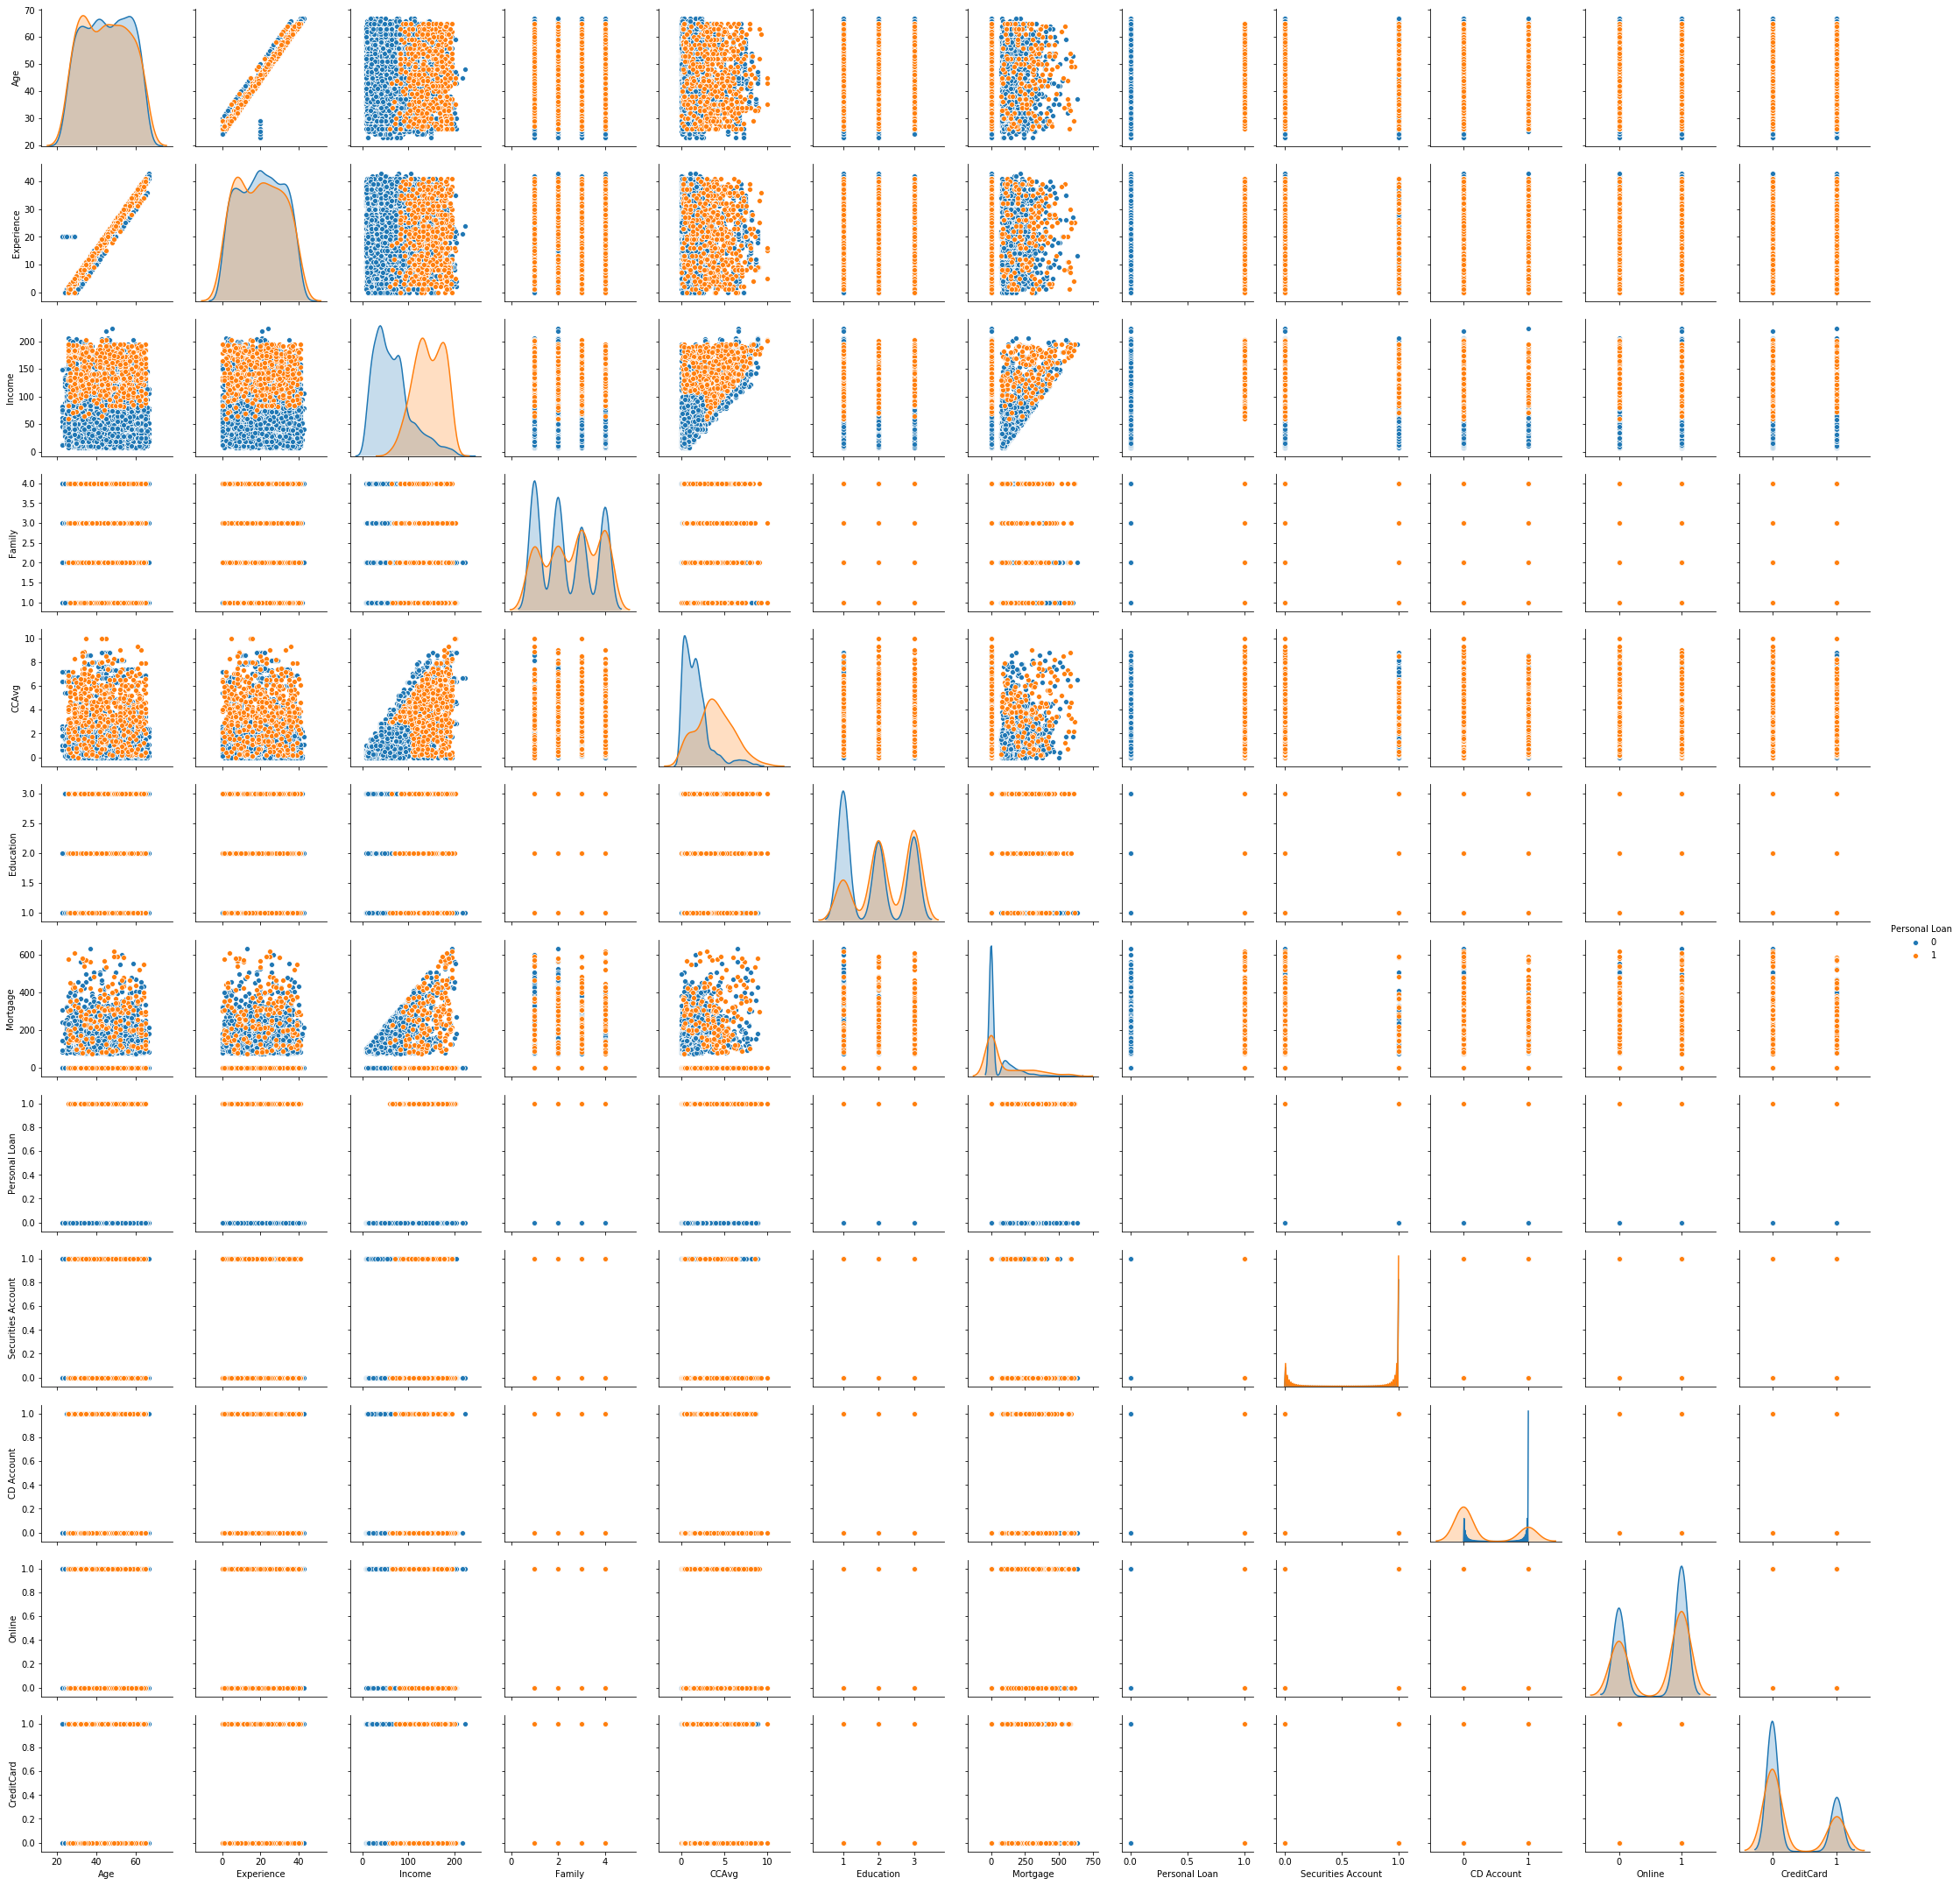

In [43]:
sns.pairplot(df,hue = "Personal Loan")

In [44]:
df2=df[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']]

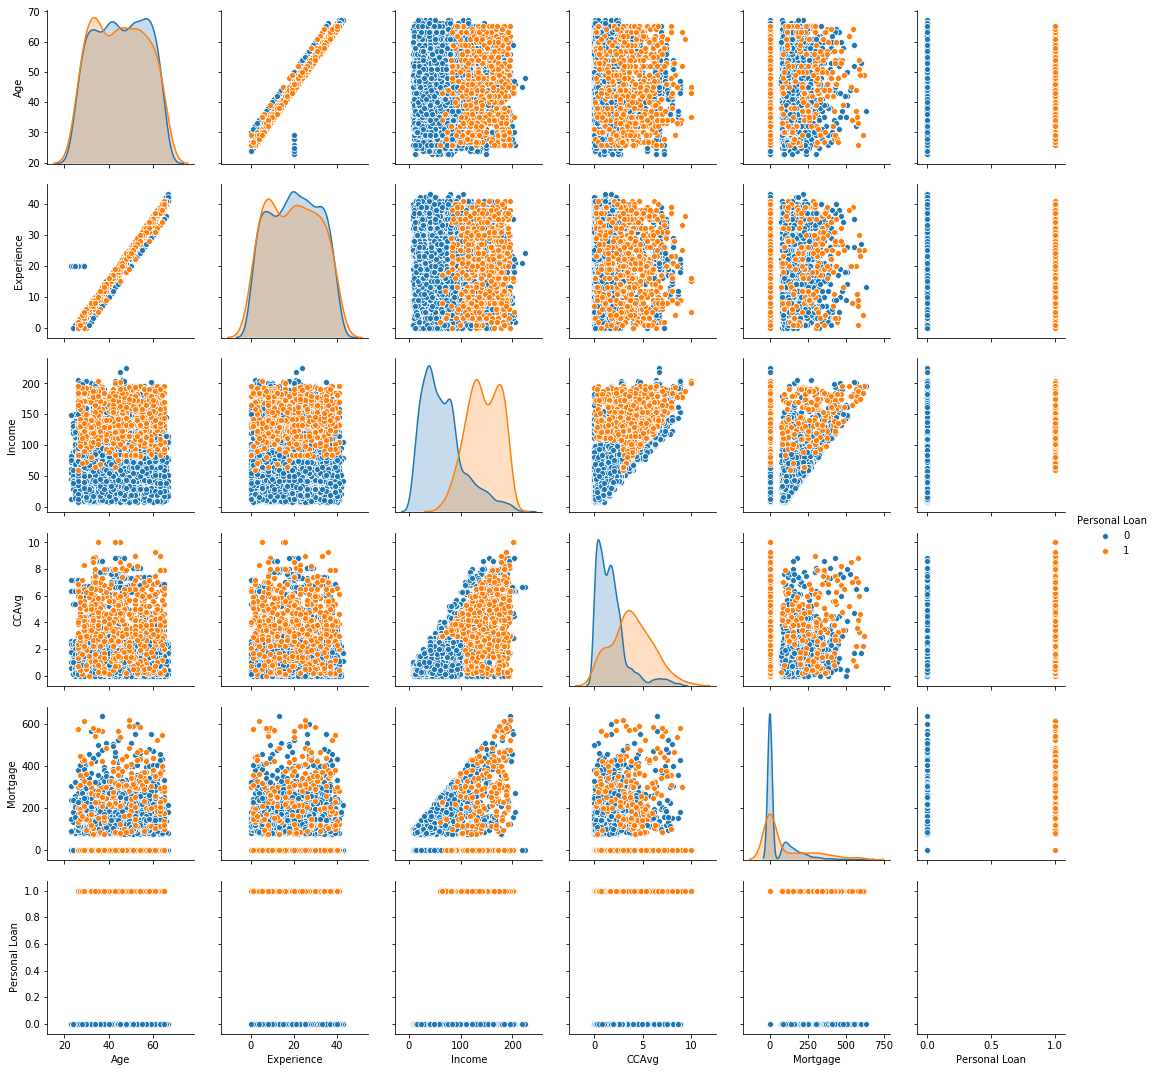

In [45]:
sns.pairplot(df2,hue = "Personal Loan")

In [46]:
#Numerical featues distrubition and analysis based on Personal Loan. Income, CCAvg, Mortgage have good distribution.

In [47]:
df3=df[['Family','Education','Securities Account','CD Account','Online','CreditCard','Personal Loan']]

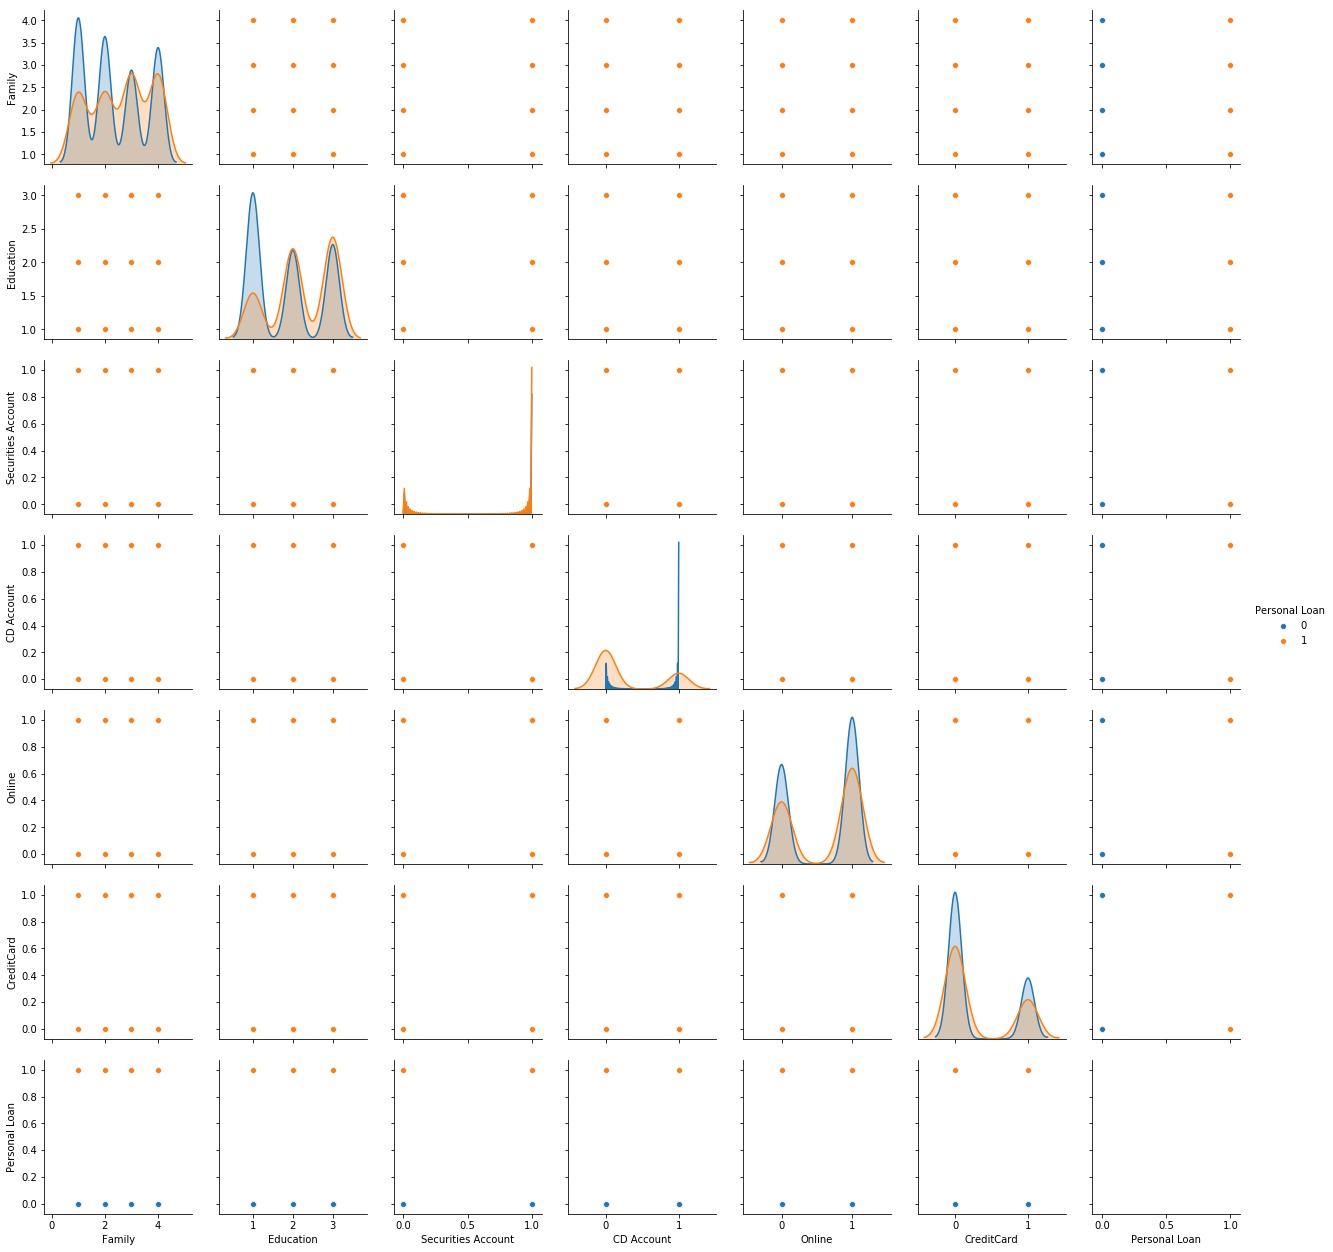

In [48]:
sns.pairplot(df3,hue = "Personal Loan")

In [49]:
#catagorical Features distribution and analysis based on Personal loan status, CD Account and Online and Creditcard have good distribution 

In [50]:
df.var()

Age                     131.404166
Experience              126.630804
Income                 2119.104235
Family                    1.317130
CCAvg                     3.054312
Education                 0.705380
Mortgage              10345.697538
Personal Loan             0.086801
Securities Account        0.093519
CD Account                0.056763
Online                    0.240678
CreditCard                0.207606
dtype: float64

In [51]:
df['Personal Loan'][df['Personal Loan'] >= 0].sum()

480

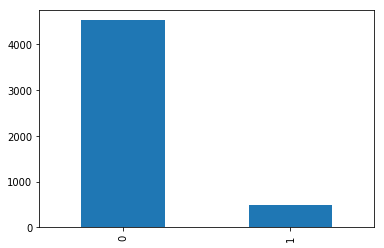

In [52]:
df['Personal Loan'].value_counts().head(10).plot.bar()

we have a healthy mixture of target variable. i.e data has around 10% of target variable as postive 

In [53]:
X = df.drop("Personal Loan", axis=1)
y = df["Personal Loan"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [54]:
def logisticReg(X, y, test_size = 0.3, seed = 7):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    ### Unoptimized probability threshold based performance numbers
    # Train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > 0.5, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    trainResults=[X_train.shape[0], 0.5, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    testResults=[X_test.shape[0], 0.5, testAccuracy, testRecall, testPrecision, testF1score]
    
    #### Optimize probability threshold and calculate performance numbers
    y_predictProb = model.predict_proba(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])
    optimalF1 = 0
    optimalTh = 0
    for th in thresholds:
        preds = np.where(model.predict_proba(X_train)[:,1] > th, 1, 0)
        f1Score = f1_score(y_train, preds)
        if(optimalF1 < f1Score):
            optimalF1 = f1Score
            optimalTh = th

    # Optimal probability threshold based train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > optimalTh, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    optimalTrainResults=[X_train.shape[0], optimalTh, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Optimal probability threshold based test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > optimalTh, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    optimalTestResults=[X_test.shape[0], optimalTh, testAccuracy, testRecall, testPrecision, testF1score]
    # Concatenate Train and Test results to resultsDf
    resultsDf = pd.DataFrame( index=["dataSize", "optimalTh", "accuracy", "recall", "precision", "f1_score"])
    resultsDf['unOptimalTrainResults'] = trainResults
    resultsDf['unOptimalTestResults'] = testResults
    resultsDf['optimalTrainResults'] = optimalTrainResults
    resultsDf['optimalTestResults'] = optimalTestResults
    return resultsDf.round(2)

In [55]:
def NaiveBayes(X, y, test_size = 0.3, seed = 7):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model = GaussianNB()
    model.fit(X_train, y_train)
    ### Unoptimized probability threshold based performance numbers
    # Train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > 0.5, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    trainResults=[X_train.shape[0], 0.5, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    testResults=[X_test.shape[0], 0.5, testAccuracy, testRecall, testPrecision, testF1score]
    
    #### Optimize probability threshold and calculate performance numbers
    y_predictProb = model.predict_proba(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])
    optimalF1 = 0
    optimalThN = 0
    for th in thresholds:
        preds = np.where(model.predict_proba(X_train)[:,1] > th, 1, 0)
        f1Score = f1_score(y_train, preds)
        if(optimalF1 < f1Score):
            optimalF1 = f1Score
            optimalThN = th

    # Optimal probability threshold based train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > optimalThN, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    optimalTrainResults=[X_train.shape[0], optimalThN, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Optimal probability threshold based test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > optimalThN, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    optimalTestResults=[X_test.shape[0], optimalThN, testAccuracy, testRecall, testPrecision, testF1score]
    # Concatenate Train and Test results to resultsDf
    resultsDf = pd.DataFrame( index=["dataSize", "optimalTh", "accuracy", "recall", "precision", "f1_score"])
    resultsDf['unOptimalTrainResults'] = trainResults
    resultsDf['unOptimalTestResults'] = testResults
    resultsDf['optimalTrainResults'] = optimalTrainResults
    resultsDf['optimalTestResults'] = optimalTestResults
    return resultsDf.round(2)

Accuracy for k=3 is  0.9193333333333333
Accuracy for K =1 to 19 {1: 0.92, 3: 0.9193333333333333, 5: 0.9146666666666666, 7: 0.9133333333333333, 9: 0.9153333333333333, 11: 0.9146666666666666, 13: 0.914, 15: 0.9146666666666666, 17: 0.916, 19: 0.918}
Optimum value for k = 1


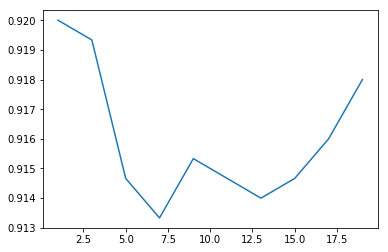

In [56]:
NNH = KNeighborsClassifier(n_neighbors= 3)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
print("Accuracy for k=3 is ",NNH.score(X_test, y_test))
for x in range(1, 20, 2):
    NNH = KNeighborsClassifier(n_neighbors= x)
    NNH.fit(X_train, y_train)
    predicted_labels = NNH.predict(X_test)
    if x==1:
        acc=({x:NNH.score(X_test, y_test)})
    else:
        acc.update({x:NNH.score(X_test, y_test)})
print("Accuracy for K =1 to 19",acc)
print("Optimum value for k = "+str(max(acc,key=acc.get)))
plt.plot(acc.keys(),acc.values())

In [57]:
logisticReg(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,unOptimalTrainResults,unOptimalTestResults,optimalTrainResults,optimalTestResults
dataSize,3500.00,1500.00,3500.00,1500.00
optimalTh,0.50,0.50,0.38,0.38
accuracy,0.95,0.95,0.95,0.95
recall,0.59,0.62,0.68,0.69
precision,0.82,0.83,0.76,0.75
f1_score,0.69,0.71,0.72,0.72


In [58]:
NaiveBayes(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,unOptimalTrainResults,unOptimalTestResults,optimalTrainResults,optimalTestResults
dataSize,3500.00,1500.00,3500.00,1500.00
optimalTh,0.50,0.50,0.06,0.06
accuracy,0.88,0.88,0.87,0.86
recall,0.56,0.59,0.81,0.86
precision,0.42,0.40,0.41,0.39
f1_score,0.48,0.48,0.54,0.54


In [59]:
predicted_labels = NNH.predict(X_train)
metrics.confusion_matrix(predicted_labels, y_train)

array([[3087,  255],
       [  71,   87]], dtype=int64)

In [60]:
model = LogisticRegression()
model.fit(X_train, y_train)
trainPreds = np.where(model.predict_proba(X_train)[:,1] > 0.38, 1, 0)
metrics.confusion_matrix(trainPreds, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[3086,  114],
       [  72,  228]], dtype=int64)

In [61]:
model = GaussianNB()
model.fit(X_train, y_train)
trainPreds = np.where(model.predict_proba(X_train)[:,1] > 0.6, 1, 0)
metrics.confusion_matrix(trainPreds, y_train)

array([[2915,  158],
       [ 243,  184]], dtype=int64)

## inference - Both NaiveBayes and Logistic Regression can perform better in this case because we can tune the accuracy and F1 score to predict the outcome of Personal loans given, which isnt possible in KNN model.

##best model for the this data is Logistic Regression, closely followed by Naive Bayes.
